## Week 8 Lab exercises

In this week we will investigate numerical interpolation and integration.

In [2]:
import numpy as np
from sympy import symbols, simplify, pprint
from scipy.interpolate import lagrange
from scipy.integrate import trapezoid
from scipy.integrate import simpson
from scipy.interpolate import CubicHermiteSpline
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# We will be working with this test function throughout the exercises:

def get_y_test_function(a_x_points) :
    y_test = np.exp(-a_x_points*a_x_points) + np.sin(a_x_points)
    return y_test

def get_dydx_test_function(a_x_points) :
    dydt_test = -2.0 * a_x_points * np.exp(-a_x_points*a_x_points) + np.cos(a_x_points)
    return dydt_test    

### ACTIVITY 1 - interpolation: 

We are given two points and are asked to fit a function to them. We construct a Lagrange interpolating polynomial using sympy to work out the polynomial for us. We obtain a first order polynomial that goes through the points and plot it.

Python has a function for calculating Lagrange polynomials for a given set of points called `scipy.interpolate.lagrange`. We use this to check our polynomial.


Using sympy we get 0.12544570880996*x + 0.787209250119254
Using the scipy function we get 
  
0.1254 x + 0.7872
We can also return the coefficients of the polynomial as an array:  [0.12544571 0.78720925]


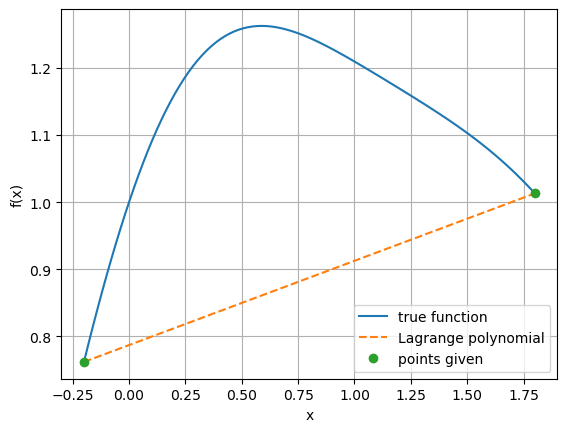

In [4]:
x_points = np.array([-0.2, 1.8])
y_points = get_y_test_function(x_points)

# Construct the polynomial using sympy
[x1,x2] = x_points
[f1,f2] = y_points

x = symbols('x')
L1 = (x - x2 ) / (x1 - x2)
L2 = (x - x1 ) / (x2 - x1)
P = f1 * L1 + f2 * L2
print("Using sympy we get", simplify(P))

lagrange_polynomial = lagrange(x_points, y_points)
print("Using the scipy function we get \n",lagrange_polynomial)
print("We can also return the coefficients of the polynomial as an array: ", 
      lagrange_polynomial.coef)

x_true = np.linspace(-0.2,1.8,100)
plt.plot(x_true, get_y_test_function(x_true), '-', label="true function")
plt.plot(x_true, lagrange_polynomial(x_true), '--', label="Lagrange polynomial")
plt.plot(x_points, y_points, 'o', label="points given")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid();

Using sympy we get -0.371055692258178*x**2 + 0.719134816423045*x + 0.920789299332198
Using the scipy function we get 
          2
-0.3711 x + 0.7191 x + 0.9208


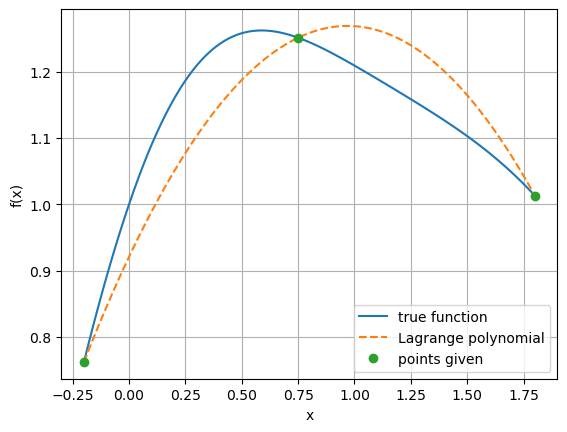

In [5]:
#solution repeated before but with an ADDITIONAL POINT in x,y

x_points = np.array([-0.2, 0.75, 1.8])
y_points = get_y_test_function(x_points)

# Your code here...

# Construct the polynomial using sympy (NEW x3 and f3)
[x1,x2,x3] = x_points
[f1,f2,f3] = y_points

x = symbols('x')
L1 = (x - x2 ) / (x1 - x2) * (x - x3 ) / (x1 - x3)   # L1 and L2 altered here for new x3 points
L2 = (x - x1 ) / (x2 - x1) * (x - x3 ) / (x2 - x3)
L3 = (x - x1 ) / (x3 - x1) * (x - x2 ) / (x3 - x2)  # new L
P = f1 * L1 + f2 * L2 + f3 * L3 # new f3 and L3 term
print("Using sympy we get", simplify(P))

lagrange_polynomial = lagrange(x_points, y_points)
print("Using the scipy function we get \n",lagrange_polynomial)

x_true = np.linspace(-0.2,1.8,100)
plt.plot(x_true, get_y_test_function(x_true), '-', label="true function")
plt.plot(x_true, lagrange_polynomial(x_true), '--', label="Lagrange polynomial")
plt.plot(x_points, y_points, 'o', label="points given")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid();

### Q1.1 Higher order Lagrange polynomial

Now we are given 3 points! What order polynomial can we construct? Construct the Langrange interpolating polynomial from scratch, verify it using the `scipy.interpolate.lagrange` function and then plot it as we did above.

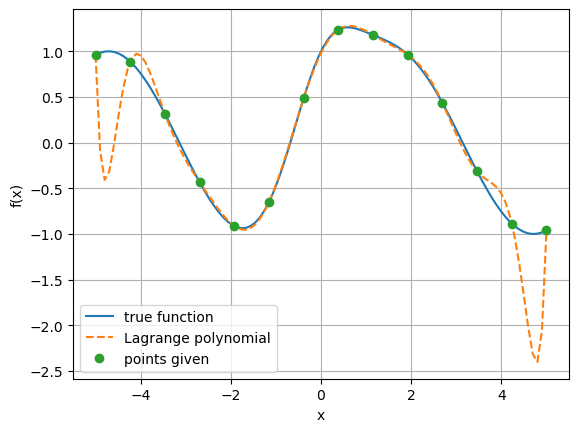

In [6]:
# originally here:
#x_points = np.array([-0.2, 0.75, 1.8])
#y_points = get_y_test_function(x_points)

# NEW:

N = 14
a = -5
b = 5
x_points = np.linspace(a,b,N)
y_points = get_y_test_function(x_points)

lagrange_polynomial = lagrange(x_points, y_points)
x_true = np.linspace(a,b,100)
plt.plot(x_true, get_y_test_function(x_true), '-', label="true function")
plt.plot(x_true, lagrange_polynomial(x_true), '--', label="Lagrange polynomial")
plt.plot(x_points, y_points, 'o', label="points given")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid();

### Q1.2 Higher order Lagrange polynomial using many equal spaced points

To get a better fit over a wider range from $[-5.0,5.0]$ you decide to divide the interval into N points, and then fit a higher order polynomial using `scipy.interpolate.lagrange`. What happens as you increase N? Does the fit get better or worse? What is this phenomenon called?

#### OPTIONAL: 

Construct a series of Lagrange polynomials that fit 3 points in the interval at a time, and compare the overall fit to the composite cubic Hermite polynomial fit. What is the problem with using Lagrange polynomials rather than Hermite ones when constructing a composite function?

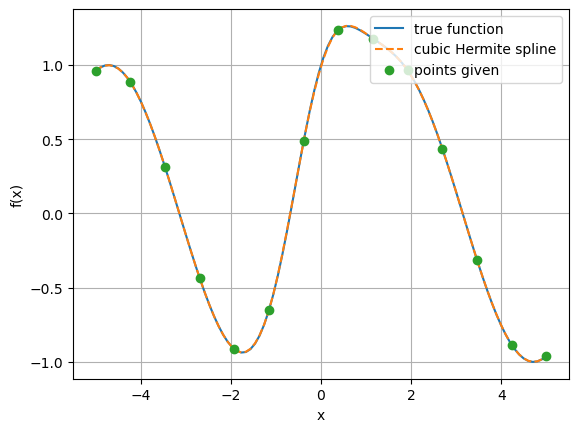

In [7]:
# NEW:

N = 14
a = -5
b = 5
x_points = np.linspace(a,b,N)
y_points = get_y_test_function(x_points)

# Your code here...

# Also need the derivatives
dydx_at_points = get_dydx_test_function(x_points)
hermite_interpolator = CubicHermiteSpline(x_points, y_points, dydx_at_points)

# This just gives an interpolating object, not an analytic expression
# as each section has its own cubic polynomial.
#print(hermite_interpolator)
x_true = np.linspace(a,b,100)

# We just use the interpolator like a function, and feed it the x points that we
# want the y values for
y_hermite_function = hermite_interpolator(x_true)

# Now do the plots
plt.plot(x_true, get_y_test_function(x_true), '-', label="true function")
plt.plot(x_true, y_hermite_function, '--', label="cubic Hermite spline")
plt.plot(x_points, y_points, 'o', label="points given")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc=1)
plt.grid();

### Q1.3 Cubic Hermite spline

You decide to instead fit a composite Hermite polynomial to the points. What more information do you need? Construct the Hermite polynomial using the Python function `scipy.interpolate.CubicHermiteSpline`. What kind of object does this function return? How do you use it to plot the function you have constructed? What number of points do you need to get a good fit?

#### OPTIONAL: 

Construct a series of Lagrange polynomials that fit 3 points in the interval at a time, and compare the overall fit to the composite cubic Hermite polynomial fit. What is the problem with using Lagrange polynomials rather than Hermite ones when constructing a composite function?

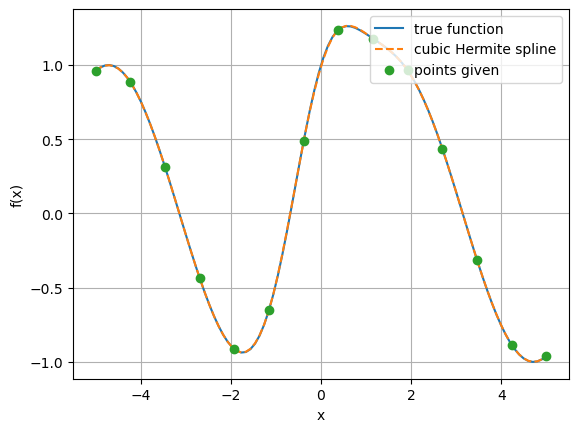

In [8]:
N = 14
a = -5
b = 5
x_points = np.linspace(a,b,N)
y_points = get_y_test_function(x_points)

# Your code here...

# Also need the derivatives
dydx_at_points = get_dydx_test_function(x_points)
hermite_interpolator = CubicHermiteSpline(x_points, y_points, dydx_at_points)

# This just gives an interpolating object, not an analytic expression
# as each section has its own cubic polynomial.
#print(hermite_interpolator)
x_true = np.linspace(a,b,100)

# We just use the interpolator like a function, and feed it the x points that we
# want the y values for
y_hermite_function = hermite_interpolator(x_true)

# Now do the plots
plt.plot(x_true, get_y_test_function(x_true), '-', label="true function")
plt.plot(x_true, y_hermite_function, '--', label="cubic Hermite spline")
plt.plot(x_points, y_points, 'o', label="points given")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc=1)
plt.grid();

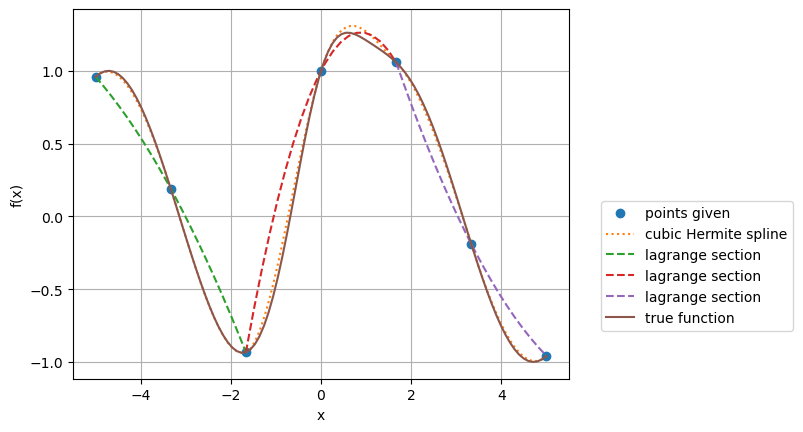

In [9]:
# Optional using lagrange interpolation

n_intervals = 3
N = 2*n_intervals+1
a = -5
b = 5
x_points = np.linspace(a,b,N)
y_points = get_y_test_function(x_points)
dydx_at_points = get_dydx_test_function(x_points)
plt.plot(x_points, y_points, 'o', label="points given")

# Your code here:
hermite_interpolator = CubicHermiteSpline(x_points, y_points, dydx_at_points)
plt.plot(x_true, hermite_interpolator(x_true), ':', label="cubic Hermite spline")

# This just gives an interpolating object
for interval in np.arange(n_intervals) :
    x_points_interval = x_points[interval*2:(interval+1)*2+1]
    y_points_interval = get_y_test_function(x_points_interval)
    lagrange_polynomial = lagrange(x_points_interval, y_points_interval)
    x_true = np.linspace(x_points_interval[0],x_points_interval[2],20)
    plt.plot(x_true, lagrange_polynomial(x_true),'--', label="lagrange section")

x_true = np.linspace(a,b,100)
plt.plot(x_true, get_y_test_function(x_true), '-', label="true function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(bbox_to_anchor=(1.05, 0.5))
plt.grid();

### Q1.4 Gauss Lobato nodes

You finally decide to move the points so they are not evenly distributed, to the Gauss Lobato nodes. Find the location of the Gauss Lobato nodes for an integer N number of points and an interval $[-5,5]$ and fit a lagrange polynomial to it using `scipy.interpolate.lagrange`. What is the smallest number N that fits the points well (just comparing the differences by eye)?

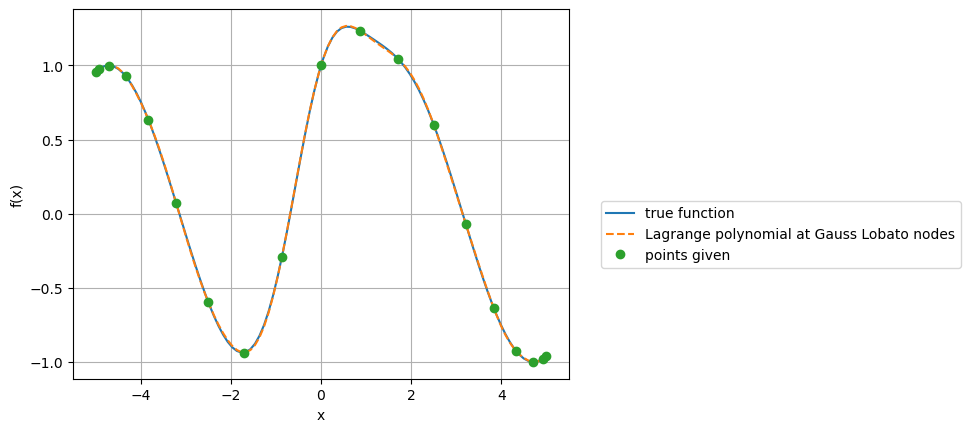

In [10]:
# Your code here...

# N is 18 gives a good fit, and note the lack of Runge phenomena as N increased
N = 18
a = -5
b = 5

# Find the Gauss Lobato nodes
indices = np.arange(N+1)
u_points = np.cos(np.pi * indices / N)
x_points = (b - a)/2.0 * u_points + (a + b)/2.0
y_points = get_y_test_function(x_points)

# Fit the colocation polynomial
lagrange_polynomial = lagrange(x_points, y_points)

# Plots
x_true = np.linspace(a,b,100)
plt.plot(x_true, get_y_test_function(x_true), '-', label="true function")
plt.plot(x_true, lagrange_polynomial(x_true), '--', label="Lagrange polynomial at Gauss Lobato nodes")
plt.plot(x_points, y_points, 'o', label="points given")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(bbox_to_anchor=(1.05, 0.5))
plt.grid();

### ACTIVITY 2:
    
Below we have implemented the composite method for the trapezium rule applied to the function above for N points, and then checked it against the numpy function `scipy.integrate.trapezoid`.

In [11]:
# all already here:

# function to get integral using trapezoid rule
a = -5
b = 5
N = 10

# Implement your own version of the composite trapezoid rule
def get_test_integral(a_num_points) :
    x_integration = np.linspace(a , b,  a_num_points)
    y_integration = get_y_test_function(x_integration)
    dx = (b - a) / (a_num_points - 1)
    integral = (dx/2)*(y_integration[0] + 2 * sum(y_integration[1:a_num_points-1])
                       + y_integration[a_num_points-1])
    return integral

integral = get_test_integral(N)

# Check using the python function
x_integration = np.linspace(a , b,  N)
y_integration = get_y_test_function(x_integration)
integral_scipy = trapezoid(y_integration,x_integration)

print("The integral with ", N, " points is ", integral, integral_scipy)

The integral with  10  points is  1.7712579642870152 1.7712579642870154


### Q2.1 Trapezoid rule

Test the integral for a range of values of N and show that the error decreases at the expected order (what is this?).

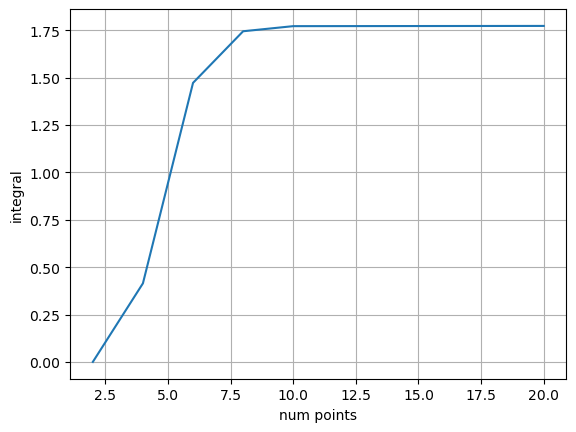

In [12]:
# Your code here...

# Try with several values, doubling the number of intervals so the step size halves
num_points_vector = np.array([2,4,6,8,10,20])
size = np.size(num_points_vector)
integrals = np.zeros_like(0.1*num_points_vector)
errors = np.zeros_like(integrals)
h_steps = np.zeros_like(integrals)

for idx, num_points in enumerate(num_points_vector) :
    integrals[idx] = get_test_integral(num_points)
    h_steps[idx] = (b-a)/(num_points-1)

plt.plot(num_points_vector, integrals)
plt.xlabel("num points")
plt.ylabel("integral")
plt.grid()

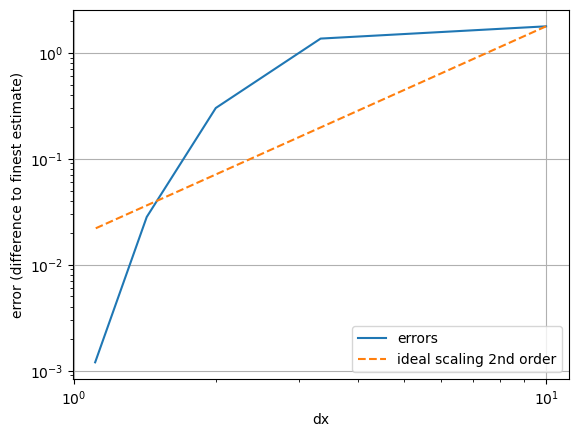

In [13]:
# Check the convergence is roughly 2nd order
errors = abs(integrals - integrals[size-1])
plt.loglog(h_steps[0:size-1], errors[0:size-1], label='errors')
order = 2.0
plt.loglog(h_steps[0:size-1], errors[0]*(h_steps[0:size-1]/h_steps[0])**order, '--', 
           label='ideal scaling 2nd order')
plt.xlabel("dx")
plt.ylabel("error (difference to finest estimate)")
plt.legend()
plt.grid()

### Q2.2 Simpson's 3 point composite rule

Implement the composite method for the Simpson's 3 point rule with N points (from scratch, as was done above for the trapezoidal rule), then check it using the python function `scipy.integrate.simpson` and again show that the error decreases at the expected order.

In [14]:
# Your code here...

# function to get integral using simpson's rule
a = -5
b = 5
N = 11

# Implement your own version of the composite trapezoid rule
def get_test_integral_simpson(a_num_points) :
    x_integration = np.linspace(a , b,  a_num_points)
    y_integration = get_y_test_function(x_integration)
    dx = (b - a) / (a_num_points - 1)
    assert a_num_points > 2, 'insufficient points for simpsons rule'
    integral = (dx/3.0) * (y_integration[0] + 2*sum(y_integration[2:a_num_points-2:2]) \
            + 4*sum(y_integration[1:a_num_points-1:2]) + y_integration[a_num_points-1])
    return integral

integral = get_test_integral_simpson(N)

# Check using the python function
x_integration = np.linspace(a , b,  N)
y_integration = get_y_test_function(x_integration)
integral_scipy = simpson(y_integration,x_integration)

print("The integral with ", N, " points is ", integral, integral_scipy)

The integral with  11  points is  1.8728458051070542 1.8728458051070547


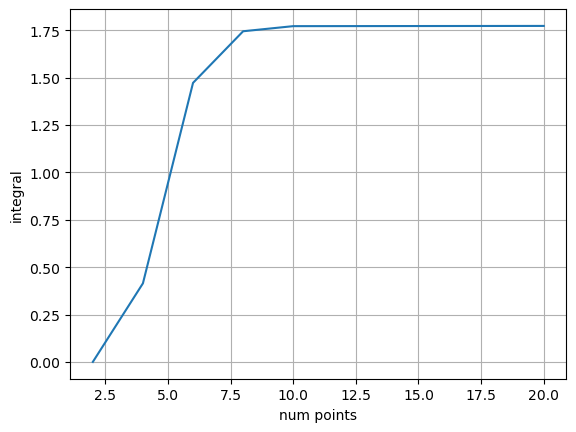

In [15]:
# Try with several values, doubling the number of intervals so the step size halves
num_points_vector = np.array([2,4,6,8,10,20])
size = np.size(num_points_vector)
integrals = np.zeros_like(0.1*num_points_vector)
errors = np.zeros_like(integrals)
h_steps = np.zeros_like(integrals)

for idx, num_points in enumerate(num_points_vector) :
    integrals[idx] = get_test_integral(num_points)
    h_steps[idx] = (b-a)/(num_points-1)

plt.plot(num_points_vector, integrals)
plt.xlabel("num points")
plt.ylabel("integral")
plt.grid()

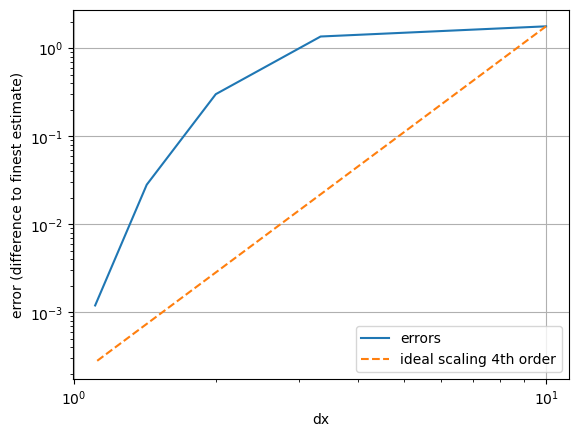

In [16]:
# Check the convergence is roughly 4th order
errors = abs(integrals - integrals[size-1])
plt.loglog(h_steps[0:size-1], errors[0:size-1], label='errors')
order = 4.0
plt.loglog(h_steps[0:size-1], errors[0]*(h_steps[0:size-1]/h_steps[0])**order, '--', 
           label='ideal scaling 4th order')
plt.xlabel("dx")
plt.ylabel("error (difference to finest estimate)")
plt.legend()
plt.grid()

### Q2.3 Gaussian quadrature

Implement a method to perform Gauss–Legendre quadrature on the interval $[0,2]$ using 2 points.

In [17]:
# Your code here...
a = 0
b = 2
u_integration = np.array([-1./np.sqrt(3.),1./np.sqrt(3.) ])
x_integration = (b - a)/2.0 * u_integration + (a + b)/2.0
print("Location of nodes is ", x_integration)
y_integration = get_y_test_function(x_integration)

# Weights are just 1 so we have:
GL_integral = sum(y_integration)

# Compare to simpson with a high number of points
x_integration = np.linspace(a , b,  20)
y_integration = get_y_test_function(x_integration)
integral_scipy = simpson(y_integration,x_integration)

print("The integral is ", GL_integral, " compared to simpson value ", integral_scipy)


Location of nodes is  [0.42264973 1.57735027]
The integral is  2.3296430983062972  compared to simpson value  2.298225850490473
